# Importing Data

In [ ]:
import requests
import pandas as pd
import io
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))
df.head()

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

# Part 1: Total 10 points

## TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year. (1 point)

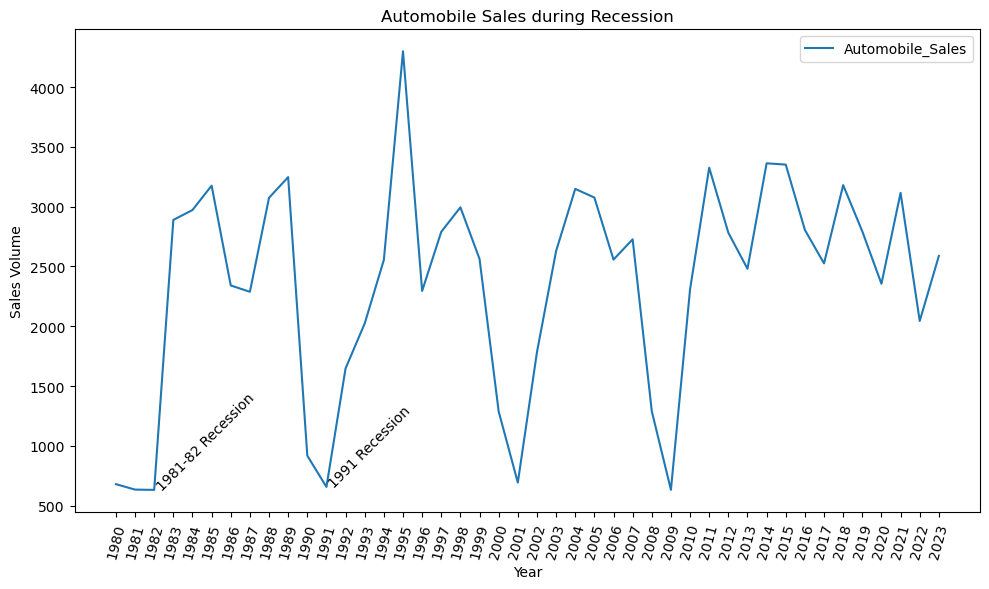

In [22]:
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line[1982], '1981-82 Recession', rotation=45)
plt.text(1991, df_line[1991], '1991 Recession', rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?" (1 point)

In [23]:
df_Mline = df[df['Recession'] == 1].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

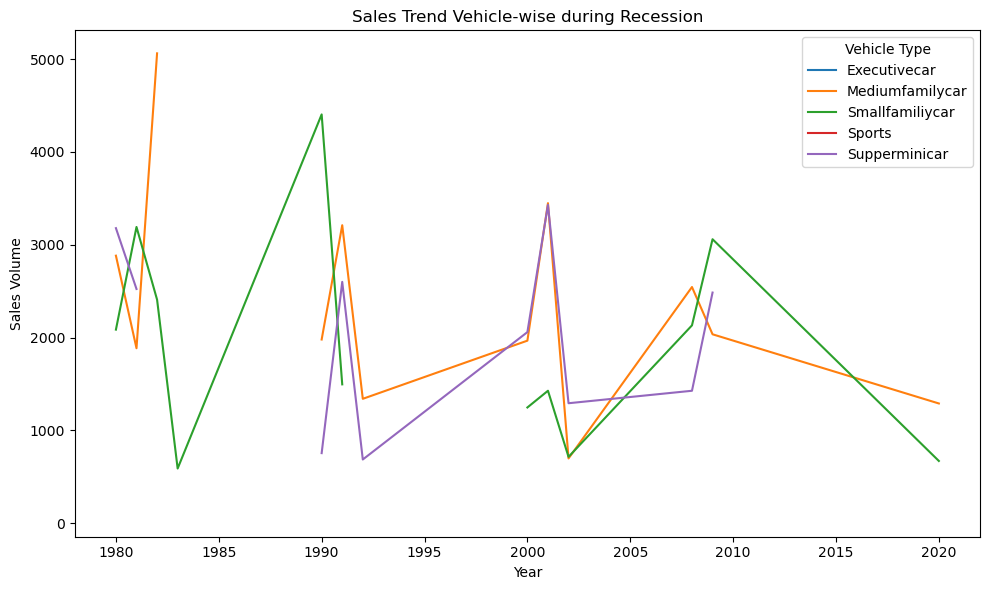

In [24]:
plt.figure(figsize=(10, 6))
df_Mline.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period. (1 point)

In [ ]:
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

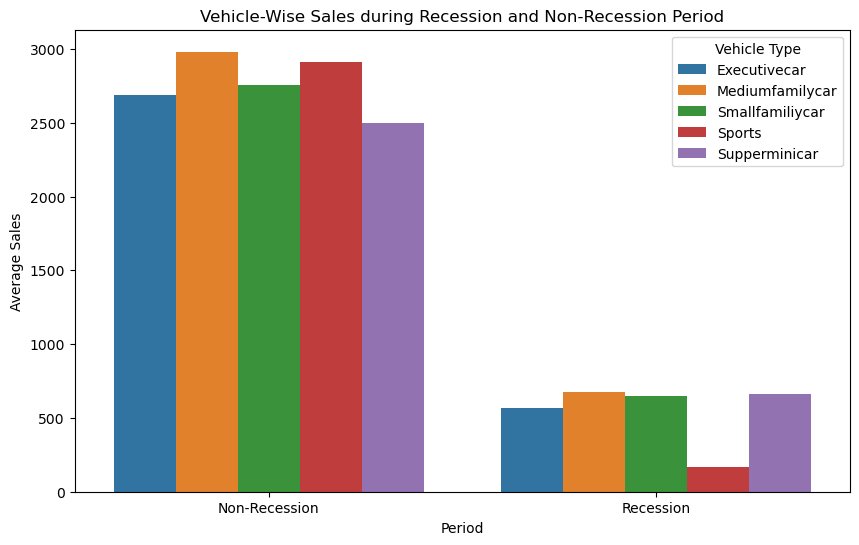

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title="Vehicle Type")
plt.show()

## TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period. (2 points)


In [26]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

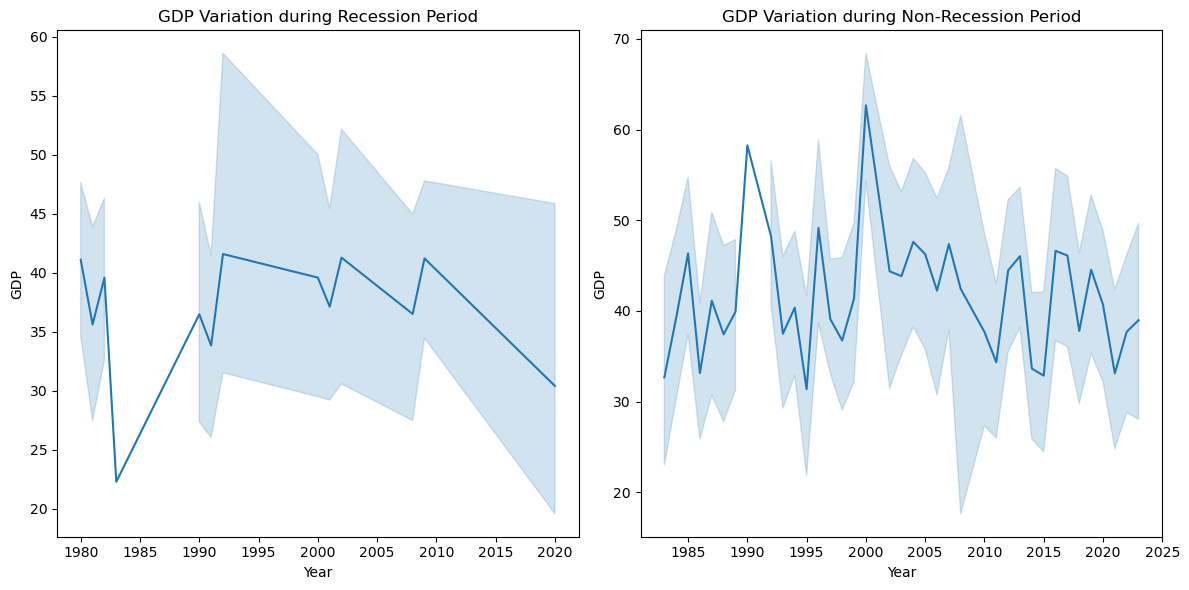

In [27]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0)
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
plt.tight_layout()
plt.show()

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales. (1 point)


In [28]:
non_rec_data = df[df['Recession'] == 0]

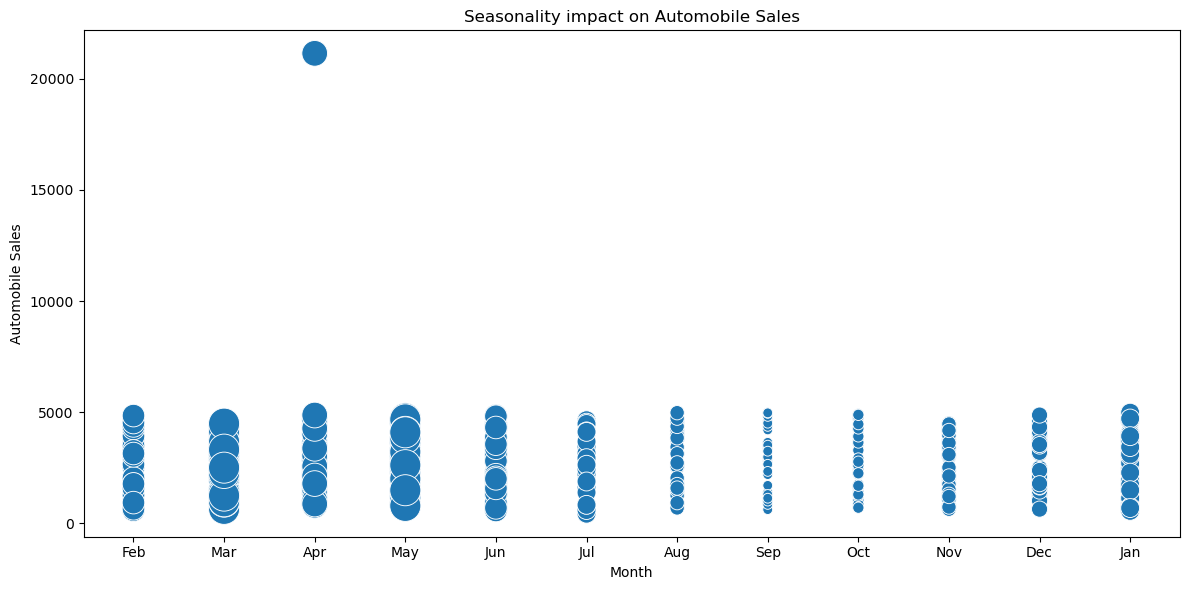

In [29]:
size = non_rec_data['Seasonality_Weight'] * 10  # Amplifying for better visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False, sizes=(50, 500))
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.tight_layout()
plt.savefig("Bubble.png")
plt.show()


## TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions. (1 point)


In [30]:
rec_data = df[df['Recession'] == 1]

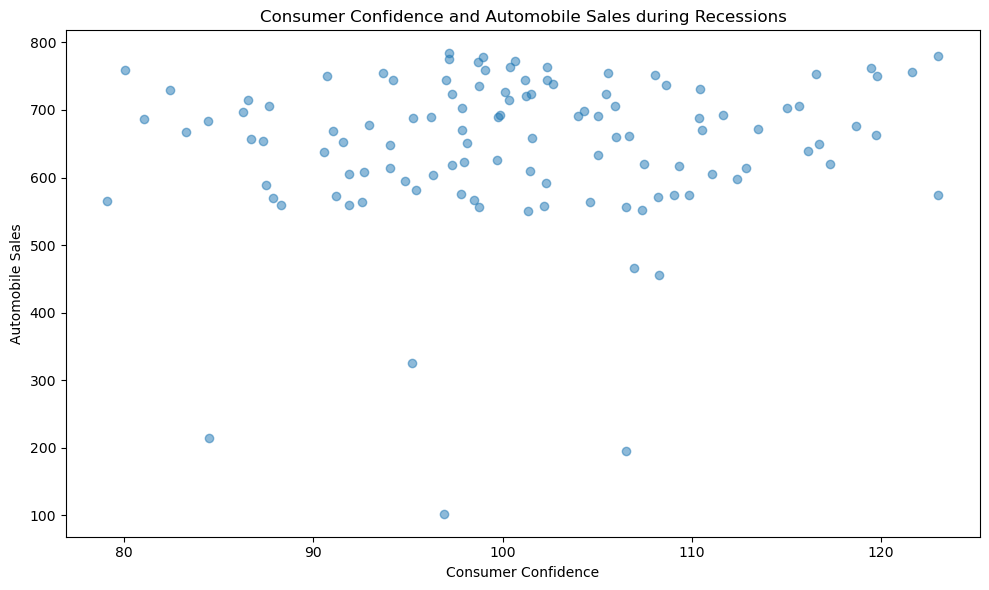

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.5)
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.tight_layout()
plt.savefig("Scatter_Confidence.png")
plt.show()


## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods. (1 point)


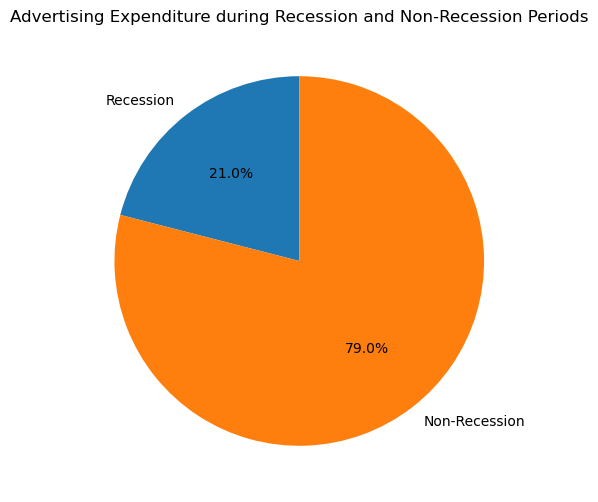

In [32]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Save the figure before showing it
plt.savefig("Pie_1.png", dpi=300, bbox_inches='tight')  # Adjust path as needed

plt.show()



## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period. (1 point)


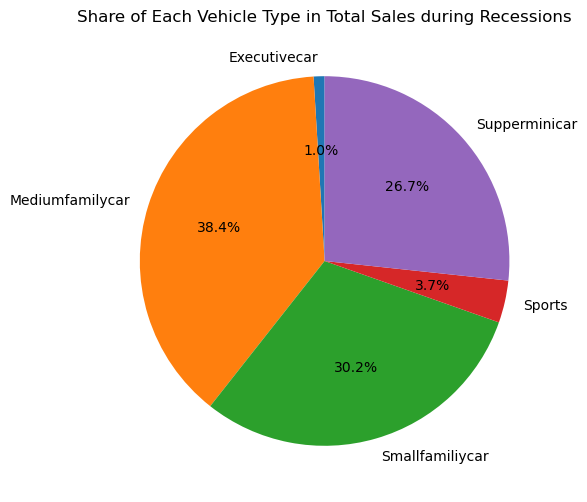

In [33]:
Rdata = df[df['Recession'] == 1]
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()


## TASK 1.9:  Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period. (1 point)


In [34]:
data= df[df['Recession'] == 1]

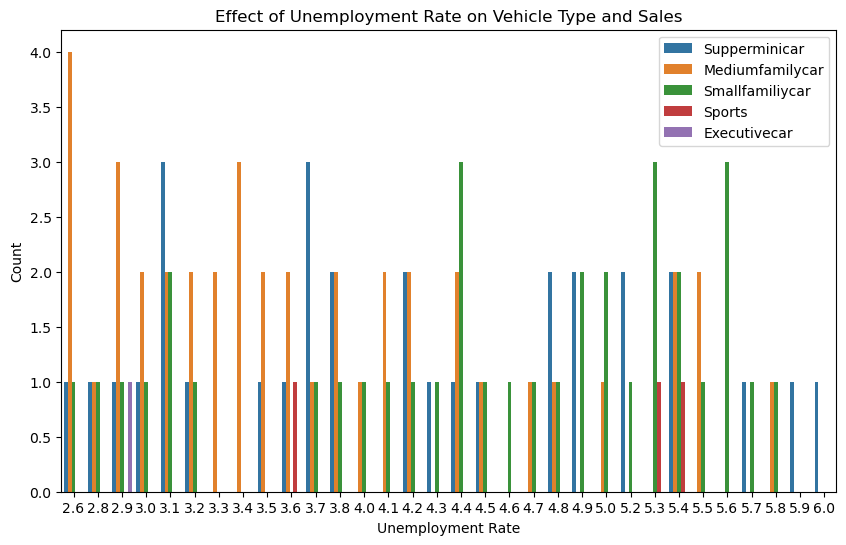

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()


# Part 2: Total 14 points



## TASK 2.1: Create a Dash application and give it a meaningful title. (2 points)



## TASK 2.2: Add drop-downs to your dashboard with appropriate titles and options. (1 point)



## TASK 2.3: Add a division for output display with appropriate 'id' and 'classname' property. (1 point)



## TASK 2.4: Creating Callbacks; Define the callback function to update the input container. (5 points)



## TASK 2.5: Create and display graphs for Recession Report Statistics. (3 points)



## TASK 2.6: Create and display graphs for Yearly Report Statistics. (2 points)

In [44]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    # Title for the dashboard with the specified styles
    html.H1("Automobile Sales Statistics Dashboard",  #May include style for title
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': '24px'}
    ),
   
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            value='Select Statistics',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
        )
    ]),

    # Dropdown for year selection
    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),
        html.Div([
            html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
        ]),])
])

#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='report-type-dropdown', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return True
    else:
        return False

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        
#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                        x='Year',
                        y='Automobile_Sales',
                        title="Automobile Sales Fluctuation Over Recession Period")
        )


#Plot 2 Calculate the average number of vehicles sold by vehicle type       
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, 
                        x='Vehicle_Type', 
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type During Recession")
        )

        
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, 
                        values='Advertising_Expenditure', 
                        names='Vehicle_Type',
                        title="Expenditure Share by Vehicle Type During Recession")
        )


# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unemployment_data = recession_data.groupby('Vehicle_Type')['Unemployment_Rate'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemployment_data, 
                        x='Vehicle_Type', 
                        y='Unemployment_Rate',
                        title="Effect of Unemployment Rate on Vehicle Type During Recession")
        )



        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)]),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)])
        ]


# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots                             
    elif (input_year and selected_statistics == 'Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]
                              
#TASK 2.5: Creating Graphs Yearly data
                              
#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, 
                        x='Year',
                        y='Automobile_Sales',
                        title="Yearly Automobile Sales Over Time")
        )

            
# Plot 2 Total Monthly Automobile sales using line chart.
        monthly_sales = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(monthly_sales, 
                        x='Month', 
                        y='Automobile_Sales',
                        title="Total Monthly Automobile Sales for the Year {}".format(input_year))
        )

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, 
                        x='Vehicle_Type', 
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type in the year {}".format(input_year))
        )

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, 
                        values='Advertising_Expenditure', 
                        names='Vehicle_Type',
                        title="Advertisement Expenditure by Vehicle Type for the Year {}".format(input_year))
        )


#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]

                
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)